In [77]:
import os
import sys
import pyspark

In [78]:
import pyspark
from pyspark.sql import DataFrame, SparkSession, Window, Row
from pyspark.sql.functions import row_number, col
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit
from pyspark.sql.functions import when
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

Spark = SparkSession.builder.appName("ENOE - Final").getOrCreate()

df = Spark.read.csv("ENOE.csv", header=True, inferSchema=True)
  
nombre_app = Spark.sparkContext.appName
print(f"El nombre de la aplicación es: {nombre_app}")

El nombre de la aplicación es: ENOE - Final


In [79]:
df.printSchema()

root
 |-- ent: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- eda: integer (nullable = true)
 |-- cs_p13_1: integer (nullable = true)
 |-- cs_p13_2: integer (nullable = true)
 |-- n_hij: integer (nullable = true)
 |-- e_con: integer (nullable = true)
 |-- hrsocup: integer (nullable = true)
 |-- ingocup: integer (nullable = true)
 |-- t_tra: integer (nullable = true)
 |-- scian: integer (nullable = true)



In [80]:
for column in df.columns:
    print(f"Valores únicos para {column}:")
    df.select(column).distinct().orderBy(column).show(32)

Valores únicos para ent:
+---+
|ent|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
| 20|
| 21|
| 22|
| 23|
| 24|
| 25|
| 26|
| 27|
| 28|
| 29|
| 30|
| 31|
| 32|
+---+

Valores únicos para sex:
+---+
|sex|
+---+
|  1|
|  2|
+---+

Valores únicos para eda:
+---+
|eda|
+---+
| 15|
| 16|
| 17|
| 18|
| 19|
| 20|
| 21|
| 22|
| 23|
| 24|
| 25|
| 26|
| 27|
| 28|
| 29|
| 30|
| 31|
| 32|
| 33|
| 34|
| 35|
| 36|
| 37|
| 38|
| 39|
| 40|
| 41|
| 42|
| 43|
| 44|
| 45|
| 46|
+---+
only showing top 32 rows

Valores únicos para cs_p13_1:
+--------+
|cs_p13_1|
+--------+
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
|       6|
|       7|
|       8|
|       9|
+--------+

Valores únicos para cs_p13_2:
+--------+
|cs_p13_2|
+--------+
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
|       6|
|       7|
|       8|
+--------+

Valores únicos para n_hij:
+-----+
|n_hij|
+-----+
|    0|
|    1|
|  

In [81]:
Filtrado1 = df.filter(df["ent"] == 9).drop("ent")

nuevo_orden = ["eda", "n_hij", "cs_p13_2", "hrsocup", "ingocup", "sex", "t_tra", "cs_p13_1", "e_con", "scian"]

df = Filtrado1.select(*nuevo_orden)

df.show()
df.count()

+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
|eda|n_hij|cs_p13_2|hrsocup|ingocup|sex|t_tra|cs_p13_1|e_con|scian|
+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
| 33|    2|       1|     30|  20000|  2|    1|       7|    5|   12|
| 52|    2|       3|      0|      0|  2|    1|       6|    5|    4|
| 24|    0|       6|     66|   5160|  2|    1|       2|    6|   18|
| 24|    0|       5|     30|  10000|  2|    1|       7|    6|   12|
| 50|    2|       3|     25|      0|  2|    1|       6|    5|    7|
| 52|    2|       3|      0|   7000|  2|    1|       4|    5|   15|
| 63|    2|       4|     24|      0|  2|    1|       7|    5|   12|
| 27|   99|       4|     30|      0|  1|    1|       7|    6|    4|
| 17|   99|       6|     36|      0|  1|    1|       2|    6|   18|
| 38|    0|       3|     16|      0|  2|    1|       8|    6|   20|
| 33|   99|       4|     24|      0|  1|    1|       7|    6|    9|
| 25|   99|       3|     27|  24000|  1|    1|  

4870

In [67]:
column_name = "scian"
data_counts = df.groupBy(column_name).count().orderBy("count", ascending=False).collect()
data_counts

[Row(scian=7, count=858),
 Row(scian=19, count=522),
 Row(scian=5, count=477),
 Row(scian=18, count=408),
 Row(scian=8, count=352),
 Row(scian=12, count=345),
 Row(scian=20, count=328),
 Row(scian=15, count=295),
 Row(scian=16, count=273),
 Row(scian=14, count=261),
 Row(scian=4, count=213),
 Row(scian=6, count=134),
 Row(scian=10, count=131),
 Row(scian=9, count=91),
 Row(scian=17, count=47),
 Row(scian=11, count=42),
 Row(scian=1, count=41),
 Row(scian=13, count=34),
 Row(scian=3, count=14),
 Row(scian=2, count=4)]

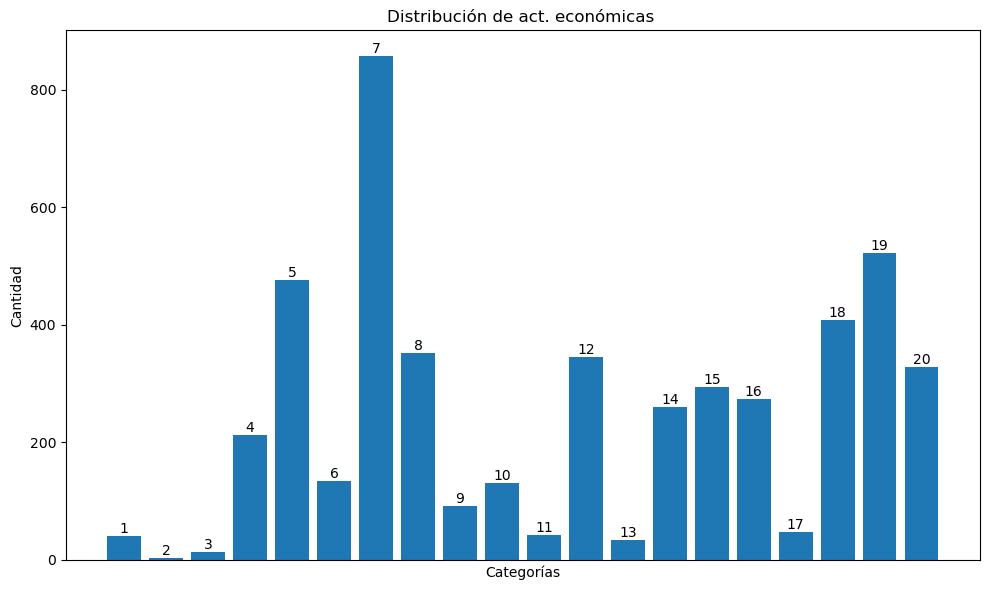

In [68]:
column_name = "scian"
data_counts = df.groupBy(column_name).count().orderBy("count", ascending=False).collect()

labels = [row[column_name] for row in data_counts]
sizes = [row["count"] for row in data_counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes)

for bar, label in zip(bars, labels):
    plt.text(bar.get_x() + bar.get_width() / 2,  
             bar.get_height(),                  
             str(label),                        
             ha="center", va="bottom")          

plt.xlabel("Categorías")
plt.ylabel("Cantidad")
plt.title(f"Distribución de act. económicas ")

plt.xticks([])  

plt.tight_layout()       
plt.show()

In [69]:
Sueldo = df.select("sex","ingocup")
Claseb = Sueldo.filter(Sueldo["ingocup"] <= 11343)
Clasem = Sueldo.filter((Sueldo["ingocup"] > 11343) & (Sueldo["ingocup"] < 77975))
Clasea = Sueldo.filter(Sueldo["ingocup"] >= 77975)
Claseb.show()
Clasem.show()
Clasea.show()

+---+-------+
|sex|ingocup|
+---+-------+
|  2|      0|
|  2|   5160|
|  2|  10000|
|  2|      0|
|  2|   7000|
|  2|      0|
|  1|      0|
|  1|      0|
|  2|      0|
|  1|      0|
|  2|      0|
|  1|   9000|
|  1|   3870|
|  1|   8600|
|  1|      0|
|  2|   6450|
|  2|      0|
|  2|      0|
|  1|   9460|
|  2|   8000|
+---+-------+
only showing top 20 rows

+---+-------+
|sex|ingocup|
+---+-------+
|  2|  20000|
|  1|  24000|
|  2|  12000|
|  2|  25000|
|  1|  12000|
|  2|  20000|
|  2|  16000|
|  1|  20000|
|  2|  11800|
|  2|  18000|
|  1|  12900|
|  1|  15050|
|  2|  18000|
|  1|  29000|
|  1|  40000|
|  2|  14000|
|  2|  15000|
|  2|  14000|
|  1|  16340|
|  1|  38700|
+---+-------+
only showing top 20 rows

+---+-------+
|sex|ingocup|
+---+-------+
|  1| 100000|
|  1| 150000|
|  2| 129000|
|  2| 100000|
|  1| 200000|
|  2|  80000|
|  1| 100000|
|  1| 120000|
|  1| 107000|
|  1| 219000|
|  1|  95000|
|  1| 130000|
+---+-------+



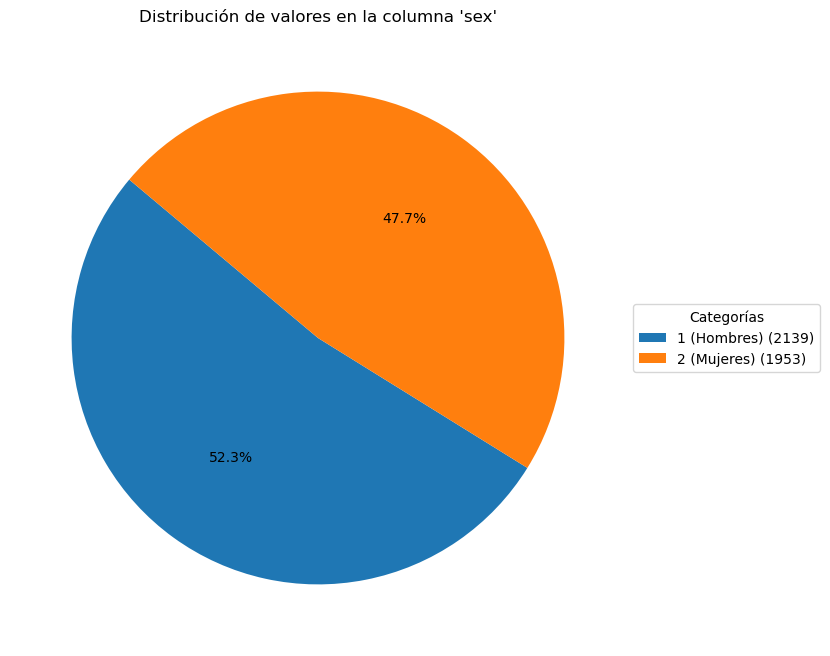

In [70]:
column_name = "sex"
data_counts = Claseb.groupBy(column_name).count().orderBy("count", ascending=False).collect()

labels = [row[column_name] for row in data_counts]  
sizes = [row["count"] for row in data_counts]      

custom_labels = [f"{label} (Hombres)" if label == 1 else f"{label} (Mujeres)" for label in labels]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,              
    autopct="%1.1f%%",        
    startangle=140,           
    textprops={"fontsize": 10}  
)

plt.legend(
    wedges, 
    [f"{custom_label} ({size})" for custom_label, size in zip(custom_labels, sizes)],  # Etiquetas con números y cantidades
    title="Categorías",
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Distribución de valores en la columna '{column_name}'")

plt.show()

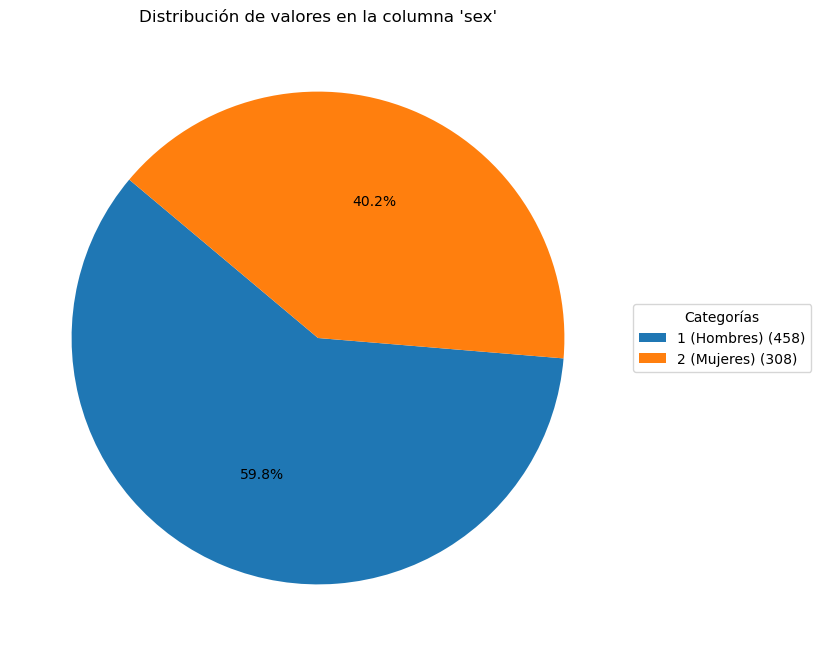

In [71]:
column_name = "sex"
data_counts = Clasem.groupBy(column_name).count().orderBy("count", ascending=False).collect()

labels = [row[column_name] for row in data_counts]  
sizes = [row["count"] for row in data_counts]      

custom_labels = [f"{label} (Hombres)" if label == 1 else f"{label} (Mujeres)" for label in labels]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,              
    autopct="%1.1f%%",        
    startangle=140,           
    textprops={"fontsize": 10}  
)

plt.legend(
    wedges, 
    [f"{custom_label} ({size})" for custom_label, size in zip(custom_labels, sizes)],  # Etiquetas con números y cantidades
    title="Categorías",
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Distribución de valores en la columna '{column_name}'")

plt.show()

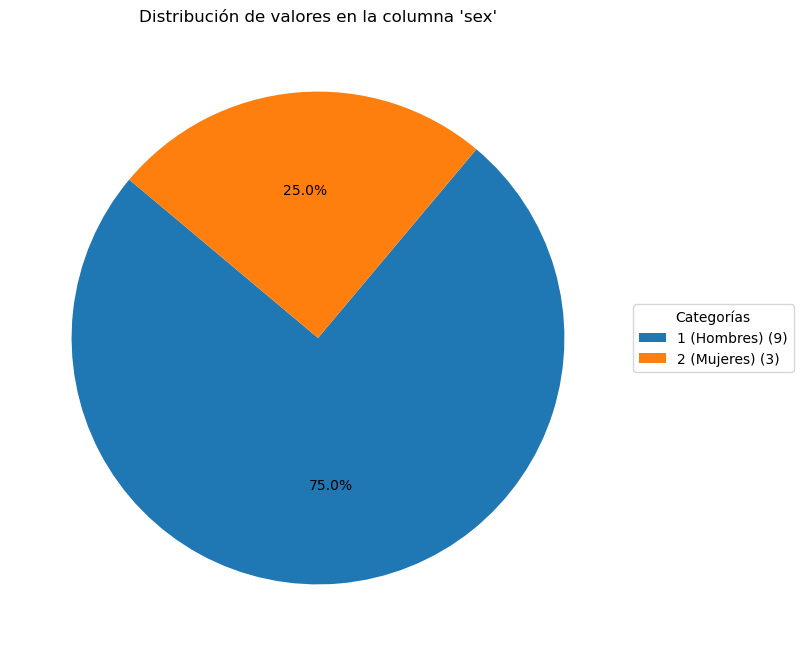

In [72]:
column_name = "sex"
data_counts = Clasea.groupBy(column_name).count().orderBy("count", ascending=False).collect()

labels = [row[column_name] for row in data_counts]  
sizes = [row["count"] for row in data_counts]      

custom_labels = [f"{label} (Hombres)" if label == 1 else f"{label} (Mujeres)" for label in labels]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,              
    autopct="%1.1f%%",        
    startangle=140,           
    textprops={"fontsize": 10}  
)

plt.legend(
    wedges, 
    [f"{custom_label} ({size})" for custom_label, size in zip(custom_labels, sizes)],  # Etiquetas con números y cantidades
    title="Categorías",
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

plt.title(f"Distribución de valores en la columna '{column_name}'")

plt.show()

In [73]:
Asig = df.withColumn(
    "Pertenencia",
    when(df["ingocup"] <= 11343, 2)  
    .when(df["ingocup"] >= 77975, 1)  
    .otherwise(3)  
)

nuevo_orden = ["Pertenencia", "eda", "n_hij", "cs_p13_2", "hrsocup", "ingocup", "sex", "t_tra", "cs_p13_1", "e_con", "scian"]

orden_final = Asig.select(*nuevo_orden)

orden_final.show()
orden_final.count()

+-----------+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
|Pertenencia|eda|n_hij|cs_p13_2|hrsocup|ingocup|sex|t_tra|cs_p13_1|e_con|scian|
+-----------+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
|          3| 33|    2|       1|     30|  20000|  2|    1|       7|    5|   12|
|          2| 52|    2|       3|      0|      0|  2|    1|       6|    5|    4|
|          2| 24|    0|       6|     66|   5160|  2|    1|       2|    6|   18|
|          2| 24|    0|       5|     30|  10000|  2|    1|       7|    6|   12|
|          2| 50|    2|       3|     25|      0|  2|    1|       6|    5|    7|
|          2| 52|    2|       3|      0|   7000|  2|    1|       4|    5|   15|
|          2| 63|    2|       4|     24|      0|  2|    1|       7|    5|   12|
|          2| 27|   99|       4|     30|      0|  1|    1|       7|    6|    4|
|          2| 17|   99|       6|     36|      0|  1|    1|       2|    6|   18|
|          2| 38|    0|       3|     16|

4870

In [75]:
count_clase_1 = orden_final.filter(col("Pertenencia") == 1).count()
count_clase_2 = orden_final.filter(col("Pertenencia") == 2).count()
count_clase_3 = orden_final.filter(col("Pertenencia") == 3).count()

resultados = [Row(Clase_1=count_clase_1, Clase_2=count_clase_2, Clase_3=count_clase_3)]

resultados_df = Spark.createDataFrame(resultados)

resultados_df.show()

+-------+-------+-------+
|Clase_1|Clase_2|Clase_3|
+-------+-------+-------+
|     12|   4092|    766|
+-------+-------+-------+



In [57]:
Clase_2.show()

+-----------+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
|Pertenencia|eda|n_hij|cs_p13_2|hrsocup|ingocup|sex|t_tra|cs_p13_1|e_con|scian|
+-----------+---+-----+--------+-------+-------+---+-----+--------+-----+-----+
|          2| 52|    2|       3|      0|      0|  2|    1|       6|    5|    4|
|          2| 24|    0|       6|     66|   5160|  2|    1|       2|    6|   18|
|          2| 24|    0|       5|     30|  10000|  2|    1|       7|    6|   12|
|          2| 50|    2|       3|     25|      0|  2|    1|       6|    5|    7|
|          2| 52|    2|       3|      0|   7000|  2|    1|       4|    5|   15|
|          2| 63|    2|       4|     24|      0|  2|    1|       7|    5|   12|
|          2| 27|   99|       4|     30|      0|  1|    1|       7|    6|    4|
|          2| 17|   99|       6|     36|      0|  1|    1|       2|    6|   18|
|          2| 38|    0|       3|     16|      0|  2|    1|       8|    6|   20|
|          2| 33|   99|       4|     24|

In [83]:
conteo = Clase_2.groupBy("scian").count().orderBy("count", ascending=False)
conteo.show()

+-----+-----+
|scian|count|
+-----+-----+
|    7|  785|
|   19|  483|
|    5|  413|
|   18|  364|
|    8|  275|
|   12|  269|
|   20|  247|
|   15|  224|
|   14|  220|
|   16|  208|
|    4|  176|
|    6|  118|
|   10|  100|
|    9|   67|
|    1|   38|
|   17|   37|
|   11|   35|
|   13|   21|
|    3|   10|
|    2|    2|
+-----+-----+

